# Import and Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor

df = pd.read_csv('auto-mpg.csv', encoding= 'unicode_escape')
df = df.drop(['model'], axis=1)                             #Unique String for each row, not needed
for i in range(7):                                          #Dropping Missing Data rows
    df=df[df.iloc[:,i] != '?']
X = df.drop(['mpg'],axis=1)
y = df['mpg']
y_test = y[:-312]
y_train = y[-312:]

def output(model, xtrain, xtest):
    print(f"Adjusted R^2: {1-(1-model.score(xtrain,y_train)) * (len(y_train)-1)/(len(y_train)-xtrain.shape[1]-1)}")
    print(f"R^2 cross val: {model.score(xtest,y_test)}")
    print('\n')



# Exploratory Data Analysis

Summary Stats


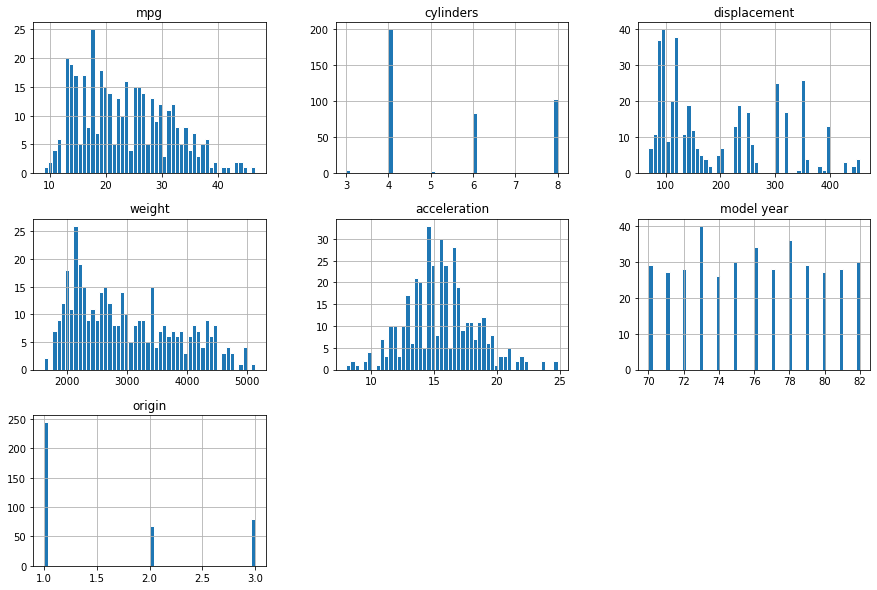

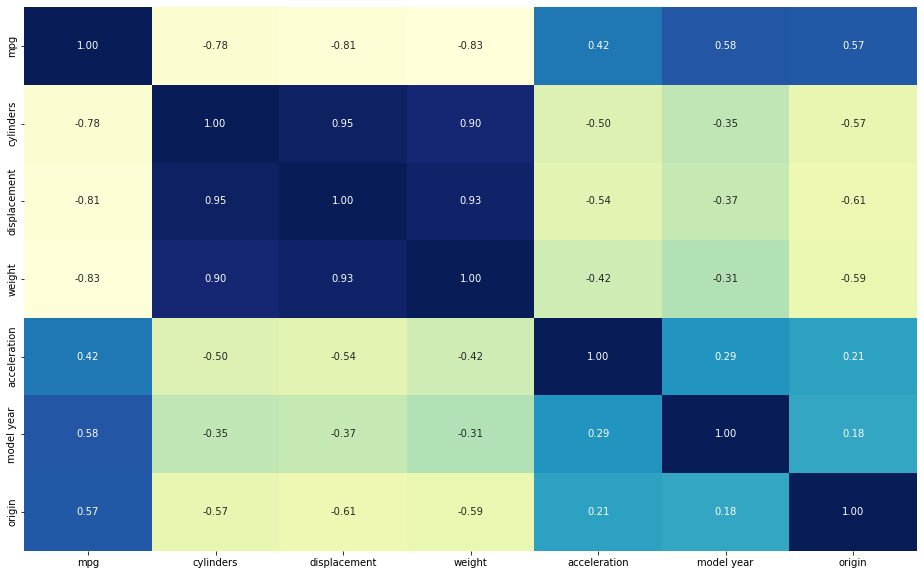

In [4]:
df.hist(bins=50, figsize=(15,10), ec='w')
plt.show()

plt.figure(figsize =(16,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt=".2f",cbar=False)
plt.show()

print("Summary Stats")
df.describe()


# Feature Selection

In [9]:
reg = LinearRegression() 

#Forward
sfs = SequentialFeatureSelector(estimator=reg)
sfs.fit(X,y)
forward = sfs.transform(X)
forward_test = forward[:-312]                
forward_train = forward[-312:]

#Backward
sfs = SequentialFeatureSelector(estimator=reg, direction="backward")
sfs.fit(X,y)
backward = sfs.transform(X)
backward_test = backward[:-312]                 
backward_train = backward[-312:]

#Recursive
sfs = RFE(estimator=reg, step=1).fit(X,y)
recur = sfs.transform(X)
recur_test = recur[:-312]                 
recur_train = recur[-312:]

# Forward Models

In [6]:
print("Linear Regression Forward Model")
model = LinearRegression().fit(forward_train,y_train)
output(model,forward_train,forward_test)

print("Ridge Forward Model")
model = RidgeCV().fit(forward_train,y_train)
output(model,forward_train,forward_test)

print("Lasso Forward Model")
model = LassoCV().fit(forward_train,y_train)
output(model,forward_train,forward_test)

print("Quadratirc Forward Model")
quad = PolynomialFeatures(degree=2)
train = quad.fit_transform(forward_train)
test = quad.fit_transform(forward_test)
model = LinearRegression().fit(train,y_train)
output(model, train, test)

print("Symbolic Regression Forward Model")
model = SymbolicRegressor(random_state=2).fit(forward_train,y_train)
output(model,forward_train,forward_test)

Linear Regression Forward Model
Adjusted R^2: 0.8047794756648288
R^2 cross val: 0.5993815192344385


Ridge Forward Model
Adjusted R^2: 0.8047385607012648
R^2 cross val: 0.6029845333899109


Lasso Forward Model
Adjusted R^2: 0.7388569278995514
R^2 cross val: 0.6814019817629865


Quadratirc Forward Model
Adjusted R^2: 0.8466751274891391
R^2 cross val: 0.7217200792810647


Symbolic Regression Forward Model
Adjusted R^2: 0.8106620236931248
R^2 cross val: 0.8636518201080536




# Backward Models

In [7]:
print("Linear Regression Backward Model")
model = LinearRegression().fit(backward_train,y_train)
output(model,backward_train,backward_test)

print("Ridge Backward Model")
model = RidgeCV().fit(backward_train,y_train)
output(model,backward_train,backward_test)

print("Lasso Backward Model")
model = LassoCV().fit(backward_train,y_train)
output(model,backward_train,backward_test)

print("Quadratirc Backward Model")
quad = PolynomialFeatures(degree=2)
train = quad.fit_transform(backward_train)
test = quad.fit_transform(backward_test)
model = LinearRegression().fit(train,y_train)
output(model,train,test)

print("Symbolic Regression Backward Model")
model = SymbolicRegressor(random_state=2)
model.fit(backward_train, y_train)
output(model,backward_train,backward_test)

Linear Regression Backward Model
Adjusted R^2: 0.8047794756648288
R^2 cross val: 0.5993815192344385


Ridge Backward Model
Adjusted R^2: 0.8047385607012648
R^2 cross val: 0.6029845333899109


Lasso Backward Model
Adjusted R^2: 0.7388569278995514
R^2 cross val: 0.6814019817629865


Quadratirc Backward Model
Adjusted R^2: 0.8466751274891391
R^2 cross val: 0.7217200792810647


Symbolic Regression Backward Model
Adjusted R^2: 0.8106620236931248
R^2 cross val: 0.8636518201080536




# Recursive Models

In [8]:
print("Linear Regression Recursive Model")
model = LinearRegression().fit(recur_train,y_train)
output(model,recur_train, recur_test)

print("Ridge Recursive Model")
model = RidgeCV().fit(recur_train,y_train)
output(model,recur_train, recur_test)

print("Lasso Recursive Model")
model = LassoCV().fit(recur_train,y_train)
output(model,recur_train, recur_test)

print("Quadratirc Recursive Model")
quad = PolynomialFeatures(degree=2)
train = quad.fit_transform(recur_train)
test = quad.fit_transform(recur_test)
model = LinearRegression().fit(train,y_train)
output(model,train,test)

print("Symbolic Regression Recursive Model")
model = SymbolicRegressor(random_state=2).fit(recur_train,y_train)
output(model,recur_train, recur_test)

Linear Regression Recursive Model
Adjusted R^2: 0.7266405654970374
R^2 cross val: 0.37577400679913653


Ridge Recursive Model
Adjusted R^2: 0.7265545510446103
R^2 cross val: 0.38221815793849234


Lasso Recursive Model
Adjusted R^2: 0.7261356193715174
R^2 cross val: 0.40082744420465233


Quadratirc Recursive Model
Adjusted R^2: 0.7306392076008781
R^2 cross val: 0.5848002019020032


Symbolic Regression Recursive Model
Adjusted R^2: 0.6388156952219444
R^2 cross val: 0.635885214017055




In [1]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 8.5 MB/s eta 0:00:00


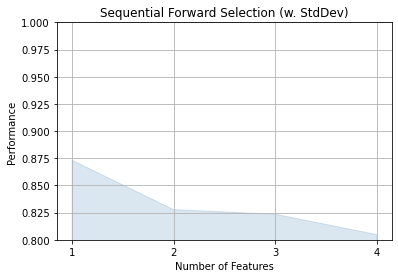

In [11]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x_train = X[-312:] 
x_test = X[:-312]

model = LinearRegression().fit(x_train,y_train)

sfs = SFS(model, 
          k_features=4, 
          forward=True, 
          cv=5)

sfs = sfs.fit(x_test, y_test)

fig1 = plot_sfs(sfs.get_metric_dict(),
                kind='std_dev',
                figsize=(6, 4))

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()